In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unc_tools import UncRegression
from unc_tools.patches import *

SAVE_DIR = "/home/yaroslav/vzlet_vault/Практикум/Кинетика фотохимического разложения/"
os.makedirs(SAVE_DIR, exist_ok=True)


def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)
    #print(f"Saved: {path}")

UncRegression.latex_style(True)

In [3]:



V0 = 30
t0 = 10

df = pd.DataFrame({})


df["V"] = [
    46,
    50.5,
    56,
    62.5,
    70.5,
    79,
    89,
    100,
    114,
    130,
    152,
    166,
    175,
    183,
    191,
    199,
    205,
    214,
    221,
    227,
    234,
    239,
    246,
    250
]
df.V += V0
df["t"] = np.arange(1, len(df.V)+1, 1)
df.t += t0

df.to_csv("prak5.csv")

V = 100
w_h2o2 = 0.3
V_h2o2 = 2.5
ro_h202 = 1.11
M_h2o2 = 34.01
C_h2o2 = (V_h2o2 * ro_h202 * w_h2o2 / M_h2o2) / (V/1000)

C_h2o2, df

(0.24478094678035875,
         V   t
 0    76.0  11
 1    80.5  12
 2    86.0  13
 3    92.5  14
 4   100.5  15
 5   109.0  16
 6   119.0  17
 7   130.0  18
 8   144.0  19
 9   160.0  20
 10  182.0  21
 11  196.0  22
 12  205.0  23
 13  213.0  24
 14  221.0  25
 15  229.0  26
 16  235.0  27
 17  244.0  28
 18  251.0  29
 19  257.0  30
 20  264.0  31
 21  269.0  32
 22  276.0  33
 23  280.0  34)

(7.054945054945056+/-0.15270016663470495, '7.58e+18+/-0.16e+18')

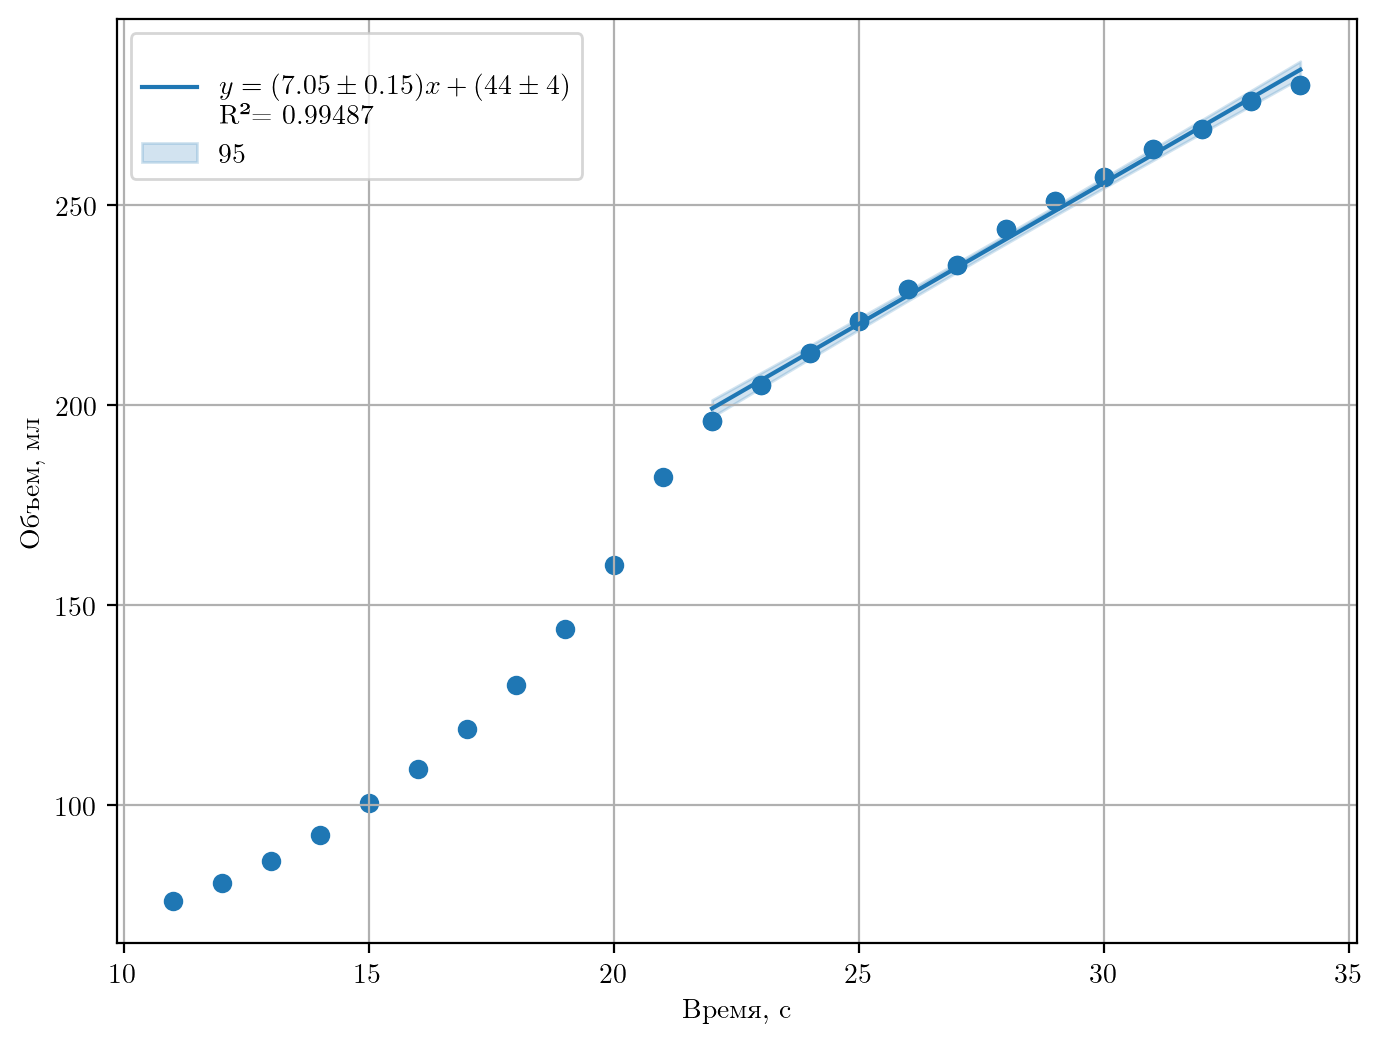

In [6]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 200)

ax.scatter(df.t, df.V)

slice1 = slice(11, len(df))
df2 = df.iloc[slice1]
reg = UncRegression(df2.t, df2.V)

reg.plot(ax=ax, show_band=True)
ax.set_xlabel("Время, с")
ax.set_ylabel("Объем, мл")
savefig("prak5.png", fig = fig)

T = 273.15
p = 101325
Na = 6.02e23
q = 1e6 * (8.314 * T / p) * (V * 0.001 / (4 * Na * 1e-3))
I0 = reg.coefs[0] / q

reg.coefs[0], f"{I0:2u}"

In [5]:
#delta_V = 1

#df2["V2"] = reg.predict_with_uncertainty(df2.t + 1)
#reg2= UncRegression(df2.V, df2.V2)
#reg2.plot(ax=axes[1])
#axes[1].set_ylabel("$V(t+\\Delta t)$, мл")
#axes[1].set_xlabel("$V(t)$, мл")



#reg2= UncRegression(df2.V.iloc[1:], df2.V.iloc[:-1])
#reg2.plot(ax=axes[1])
#axes[1].set_ylabel("$V(t+\\Delta t)$, мл")
#axes[1].set_xlabel("$V(t)$, мл")

#df2